In [5]:
using Pkg

# Установка пакетов 
Pkg.add(["DataFrames", "GLM", "RDatasets", "Plots"])

   Resolving package versions...
   Installed Mocking ─────────── v0.8.1
   Installed TZJData ─────────── v1.3.0+2024b
   Installed ExprTools ───────── v0.1.10
   Installed CategoricalArrays ─ v0.10.8
   Installed RData ───────────── v0.8.3
   Installed TimeZones ───────── v1.18.1
   Installed RDatasets ───────── v0.7.7
    Updating `~/.julia/environments/v1.10/Project.toml`
  [ce6b1742] + RDatasets v0.7.7
    Updating `~/.julia/environments/v1.10/Manifest.toml`
  [324d7699] + CategoricalArrays v0.10.8
  [e2ba6199] + ExprTools v0.1.10
  [78c3b35d] + Mocking v0.8.1
⌅ [df47a6cb] + RData v0.8.3
  [ce6b1742] + RDatasets v0.7.7
  [dc5dba14] + TZJData v1.3.0+2024b
  [f269a46b] + TimeZones v1.18.1
        Info Packages marked with ⌅ have new versions available but compatibility constraints restrict them from upgrading. To see why use `status --outdated -m`
Precompiling project...
  ✓ TZJData
  ✓ ExprTools
  ✓ CategoricalArrays
  ✓ Mocking
  ✓ CategoricalArrays → CategoricalArraysStructTypesEx

In [6]:
using DataFrames
using GLM
using RDatasets
using Plots

In [7]:
# Загрузка данных из пакета MASS
df = dataset("MASS", "Boston")

Row,Crim,Zn,Indus,Chas,NOx,Rm,Age,Dis,Rad,Tax,PTRatio,Black,LStat,MedV
,Float64,Float64,Float64,Int64,Float64,Float64,Float64,Float64,Int64,Int64,Float64,Float64,Float64,Float64
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2
6,0.02985,0.0,2.18,0,0.458,6.43,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.6,12.43,22.9
8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.9,19.15,27.1
9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5


In [8]:
first(df, 5)

Row,Crim,Zn,Indus,Chas,NOx,Rm,Age,Dis,Rad,Tax,PTRatio,Black,LStat,MedV
,Float64,Float64,Float64,Int64,Float64,Float64,Float64,Float64,Int64,Int64,Float64,Float64,Float64,Float64
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2


In [9]:
using Random

# Делим данные
Random.seed!(1234)
n = nrow(df)
shuffle = randperm(n)
train_size = Int(round(0.8 * n))
train_idx = shuffle[1:train_size]
test_idx = shuffle[train_size+1:end]
train_df = df[train_idx, :]
test_df = df[test_idx, :]

Row,Crim,Zn,Indus,Chas,NOx,Rm,Age,Dis,Rad,Tax,PTRatio,Black,LStat,MedV
,Float64,Float64,Float64,Int64,Float64,Float64,Float64,Float64,Int64,Int64,Float64,Float64,Float64,Float64
1,0.04666,80.0,1.52,0,0.404,7.107,36.6,7.309,2,329,12.6,354.31,8.61,30.3
2,1.23247,0.0,8.14,0,0.538,6.142,91.7,3.9769,4,307,21.0,396.9,18.72,15.2
3,0.18337,0.0,27.74,0,0.609,5.414,98.3,1.7554,4,711,20.1,344.05,23.97,7.0
4,0.08244,30.0,4.93,0,0.428,6.481,18.5,6.1899,6,300,16.6,379.41,6.36,23.7
5,0.6147,0.0,6.2,0,0.507,6.618,80.8,3.2721,8,307,17.4,396.9,7.6,30.1
6,0.09849,0.0,25.65,0,0.581,5.879,95.8,2.0063,2,188,19.1,379.38,17.58,18.8
7,1.22358,0.0,19.58,0,0.605,6.943,97.4,1.8773,5,403,14.7,363.43,4.59,41.3
8,0.02763,75.0,2.95,0,0.428,6.595,21.8,5.4011,3,252,18.3,395.63,4.32,30.8
9,1.13081,0.0,8.14,0,0.538,5.713,94.1,4.233,4,307,21.0,360.17,22.6,12.7


In [11]:
# Строим модель

formula = @formula(MedV ~ Crim + Zn + Indus + Chas + NOx + Rm + Age +
                   Dis + Rad + Tax + PTRatio + Black + LStat)
model = lm(formula, train_df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

MedV ~ 1 + Crim + Zn + Indus + Chas + NOx + Rm + Age + Dis + Rad + Tax + PTRatio + Black + LStat

Coefficients:
──────────────────────────────────────────────────────────────────────────────────
                    Coef.  Std. Error      t  Pr(>|t|)     Lower 95%     Upper 95%
──────────────────────────────────────────────────────────────────────────────────
(Intercept)   38.7884      5.60808      6.92    <1e-10   27.7627       49.8142
Crim          -0.111497    0.0337156   -3.31    0.0010   -0.177783     -0.04521
Zn             0.0492532   0.0159303    3.09    0.0021    0.0179334     0.0805729
Indus          0.0467366   0.0710104    0.66    0.5108   -0.0928734     0.186347
Chas           1.70812     1.01993      1.67    0.0948   -0.297116      3.71336
NOx          -19.1918      4.22822     -4.54

In [12]:
# Оценка модели
print(coeftable(model))

──────────────────────────────────────────────────────────────────────────────────
                    Coef.  Std. Error      t  Pr(>|t|)     Lower 95%     Upper 95%
──────────────────────────────────────────────────────────────────────────────────
(Intercept)   38.7884      5.60808      6.92    <1e-10   27.7627       49.8142
Crim          -0.111497    0.0337156   -3.31    0.0010   -0.177783     -0.04521
Zn             0.0492532   0.0159303    3.09    0.0021    0.0179334     0.0805729
Indus          0.0467366   0.0710104    0.66    0.5108   -0.0928734     0.186347
Chas           1.70812     1.01993      1.67    0.0948   -0.297116      3.71336
NOx          -19.1918      4.22822     -4.54    <1e-05  -27.5047      -10.8789
Rm             3.72133     0.455476     8.17    <1e-14    2.82584       4.61682
Age           -0.00380972  0.0149752   -0.25    0.7993   -0.0332518     0.0256324
Dis           -1.54018     0.222611    -6.92    <1e-10   -1.97785      -1.10252
Rad            0.307443    0

In [13]:
# Прогнозирование
y_pred = predict(model, test_df)
y_true = test_df.MedV

101-element Vector{Float64}:
 30.3
 15.2
  7.0
 23.7
 30.1
 18.8
 41.3
 30.8
 12.7
 13.8
  ⋮
 17.8
 13.6
 23.1
 24.8
 14.5
 27.9
 24.7
 12.0
 43.1

In [15]:
using Statistics

# Оцениваем точность
function mse(y_true, y_pred)
    return mean((y_true - y_pred).^2)
end
test_mse = mse(y_true, y_pred)
println("MSE на тестовой выборке: ", round(test_mse, digits=2))

MSE на тестовой выборке: 21.2


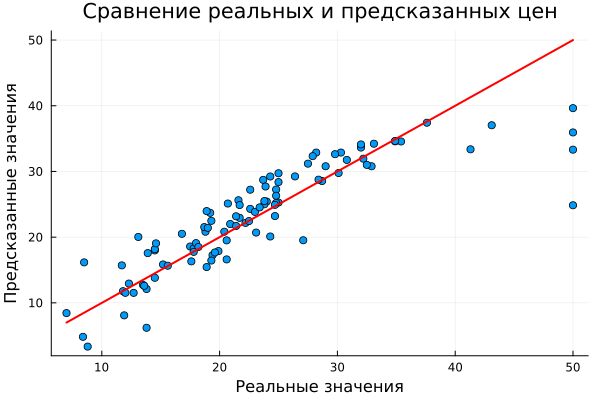

In [16]:
scatter(y_true, y_pred,
    xlabel = "Реальные значения",
    ylabel = "Предсказанные значения",
    title = "Сравнение реальных и предсказанных цен",
    legend = false)
plot!(y_true, y_true, linewidth = 2, linecolor = :red)